In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
%matplotlib inline

# Data Engineering & Analysis 

In [2]:
# Read data
data = pd.read_pickle('20231108_Dataset.pkl')
data.index.names = ['Date']
data.head()

,transformer_load,radiation,windspeed_10m,windspeed_100m,windspeed_squall,nedu_e1a,nedu_e1b,nedu_e1c,nedu_e2a,nedu_e2b,nedu_e3a,nedu_e3b,nedu_e3c,nedu_e3d,nedu_e4a
Date,,,,,,,,,,,,,,,
2021-04-02 10:15:00+00:00,0.314834,2362538.0,7.087363,8.304909,11.329289,0.000023,0.000017,0.000013,0.000029,0.000025,0.000045,0.000045,0.000045,0.000045,0.0
2021-04-02 10:30:00+00:00,0.455148,2395208.0,7.169058,8.406696,11.468938,0.000022,0.000016,0.000012,0.000029,0.000024,0.000044,0.000044,0.000044,0.000044,0.0
2021-04-02 10:45:00+00:00,0.492845,2427878.0,7.250822,8.508593,11.608627,0.000022,0.000015,0.000011,0.000028,0.000024,0.000043,0.000043,0.000043,0.000043,0.0
2021-04-02 11:00:00+00:00,0.479581,2460548.0,7.332652,8.610595,11.748355,0.000021,0.000014,0.000010,0.000028,0.000024,0.000043,0.000043,0.000043,0.000043,0.0
2021-04-02 11:15:00+00:00,0.512740,2471373.5,7.532573,8.868861,12.003352,0.000020,0.000013,0.000010,0.000028,0.000024,0.000043,0.000043,0.000043,0.000043,0.0


In [3]:
# Check for data types and general info
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90122 entries, 2021-04-02 10:15:00+00:00 to 2023-11-05 23:00:00+00:00
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transformer_load  90122 non-null  float64
 1   radiation         90119 non-null  float64
 2   windspeed_10m     90119 non-null  float64
 3   windspeed_100m    90119 non-null  float64
 4   windspeed_squall  90119 non-null  float64
 5   nedu_e1a          90122 non-null  float64
 6   nedu_e1b          90122 non-null  float64
 7   nedu_e1c          90122 non-null  float64
 8   nedu_e2a          90122 non-null  float64
 9   nedu_e2b          90122 non-null  float64
 10  nedu_e3a          90122 non-null  float64
 11  nedu_e3b          90122 non-null  float64
 12  nedu_e3c          90122 non-null  float64
 13  nedu_e3d          90122 non-null  float64
 14  nedu_e4a          90122 non-null  float64
dtypes: float64(15)
memory usage: 11.0 MB


In [4]:
# Check summary statistics
data.describe()

,transformer_load,radiation,windspeed_10m,windspeed_100m,windspeed_squall,nedu_e1a,nedu_e1b,nedu_e1c,nedu_e2a,nedu_e2b,nedu_e3a,nedu_e3b,nedu_e3c,nedu_e3d,nedu_e4a
count,90122.000000,9.011900e+04,90119.000000,90119.000000,90119.000000,90122.000000,90122.000000,90122.000000,90122.000000,90122.000000,90122.000000,90122.000000,90122.000000,90122.000000,90122.000000
mean,0.415224,5.150861e+05,4.661820,7.355531,7.955567,0.000028,0.000027,0.000027,0.000028,0.000028,0.000028,0.000028,0.000028,0.000028,0.000027
std,0.207996,7.941373e+05,2.544169,3.454582,4.168576,0.000009,0.000013,0.000014,0.000006,0.000007,0.000011,0.000011,0.000011,0.000011,0.000030
min,0.000000,-2.720625e+02,0.009033,0.013995,0.059771,0.000014,0.000000,0.000000,0.000017,0.000009,0.000014,0.000014,0.000014,0.000014,0.000000
25%,0.247469,5.450448e-11,2.792512,4.975678,4.912684,0.000020,0.000019,0.000019,0.000023,0.000023,0.000019,0.000019,0.000019,0.000019,0.000000
50%,0.363002,3.963215e+04,4.296795,7.035952,7.341977,0.000027,0.000025,0.000024,0.000029,0.000027,0.000023,0.000023,0.000023,0.000023,0.000000
75%,0.547644,7.837728e+05,6.035251,9.324676,10.149324,0.000034,0.000036,0.000037,0.000032,0.000032,0.000037,0.000037,0.000037,0.000037,0.000060
max,2.143106,3.197917e+06,20.362995,28.985344,35.749813,0.000066,0.000076,0.000076,0.000047,0.000049,0.000057,0.000057,0.000057,0.000057,0.000060


In [5]:
# Drop duplicates if any
data.drop_duplicates(inplace=True)

In [6]:
# Check rows with missing values
missing_values_rows = data[data.isnull().any(axis=1)]
missing_values_rows

,transformer_load,radiation,windspeed_10m,windspeed_100m,windspeed_squall,nedu_e1a,nedu_e1b,nedu_e1c,nedu_e2a,nedu_e2b,nedu_e3a,nedu_e3b,nedu_e3c,nedu_e3d,nedu_e4a
Date,,,,,,,,,,,,,,,
2023-10-22 05:15:00+00:00,0.559860,NaN,NaN,NaN,NaN,0.000018,0.000022,0.000022,0.000025,0.000028,0.000018,0.000018,0.000018,0.000018,0.00006
2023-10-22 05:30:00+00:00,0.619546,NaN,NaN,NaN,NaN,0.000019,0.000023,0.000024,0.000026,0.000029,0.000018,0.000018,0.000018,0.000018,0.00006
2023-10-22 05:45:00+00:00,0.631414,NaN,NaN,NaN,NaN,0.000020,0.000024,0.000025,0.000027,0.000030,0.000018,0.000018,0.000018,0.000018,0.00006


In [7]:
# Handle missing values by performing linear interpolation only for wind speeds
data['windspeed_10m'] = data['windspeed_10m'].interpolate(method='linear')
data['windspeed_100m'] = data['windspeed_100m'].interpolate(method='linear')
data['windspeed_squall'] = data['windspeed_squall'].interpolate(method='linear')

# Set radiation values to zero for the rows that had missing values
data.loc[missing_values_rows.index, 'radiation'] = 0

# Check data cleaning results
pd.concat([
    data.loc[:missing_values_rows.index[0]].tail(5),
    data.loc[missing_values_rows.index[-1]:].head(5)
])

,transformer_load,radiation,windspeed_10m,windspeed_100m,windspeed_squall,nedu_e1a,nedu_e1b,nedu_e1c,nedu_e2a,nedu_e2b,nedu_e3a,nedu_e3b,nedu_e3c,nedu_e3d,nedu_e4a
Date,,,,,,,,,,,,,,,
2023-10-22 04:15:00+00:00,0.530541,0.000000,9.584368,13.623150,18.044215,0.000017,0.000021,0.000020,0.000021,0.000024,0.000017,0.000017,0.000017,0.000017,0.000060
2023-10-22 04:30:00+00:00,0.530890,0.000000,9.584368,13.623150,18.044215,0.000017,0.000021,0.000021,0.000022,0.000025,0.000017,0.000017,0.000017,0.000017,0.000060
2023-10-22 04:45:00+00:00,0.546248,0.000000,9.584368,13.623150,18.044215,0.000017,0.000022,0.000021,0.000023,0.000026,0.000017,0.000017,0.000017,0.000017,0.000060
2023-10-22 05:00:00+00:00,0.514136,0.000000,9.584368,13.623150,18.044215,0.000017,0.000022,0.000022,0.000024,0.000027,0.000018,0.000018,0.000018,0.000018,0.000060
2023-10-22 05:15:00+00:00,0.559860,0.000000,8.366486,12.370225,15.559754,0.000018,0.000022,0.000022,0.000025,0.000028,0.000018,0.000018,0.000018,0.000018,0.000060
2023-10-22 05:45:00+00:00,0.631414,0.000000,5.930720,9.864374,10.590833,0.000020,0.000024,0.000025,0.000027,0.000030,0.000018,0.000018,0.000018,0.000018,0.000060
2023-10-22 06:00:00+00:00,0.531937,50977.241943,4.712838,8.611449,8.106372,0.000021,0.000026,0.000026,0.000027,0.000031,0.000018,0.000018,0.000018,0.000018,0.000056
2023-10-22 06:15:00+00:00,0.549389,114952.022339,4.600722,8.429365,7.899236,0.000022,0.000028,0.000028,0.000028,0.000031,0.000018,0.000018,0.000018,0.000018,0.000012
2023-10-22 06:30:00+00:00,0.515881,178926.802734,4.488628,8.247457,7.693619,0.000024,0.000030,0.000031,0.000027,0.000031,0.000017,0.000017,0.000017,0.000017,0.000000


# Data Visualization

Text(0, 0.5, 'Transformer Load')

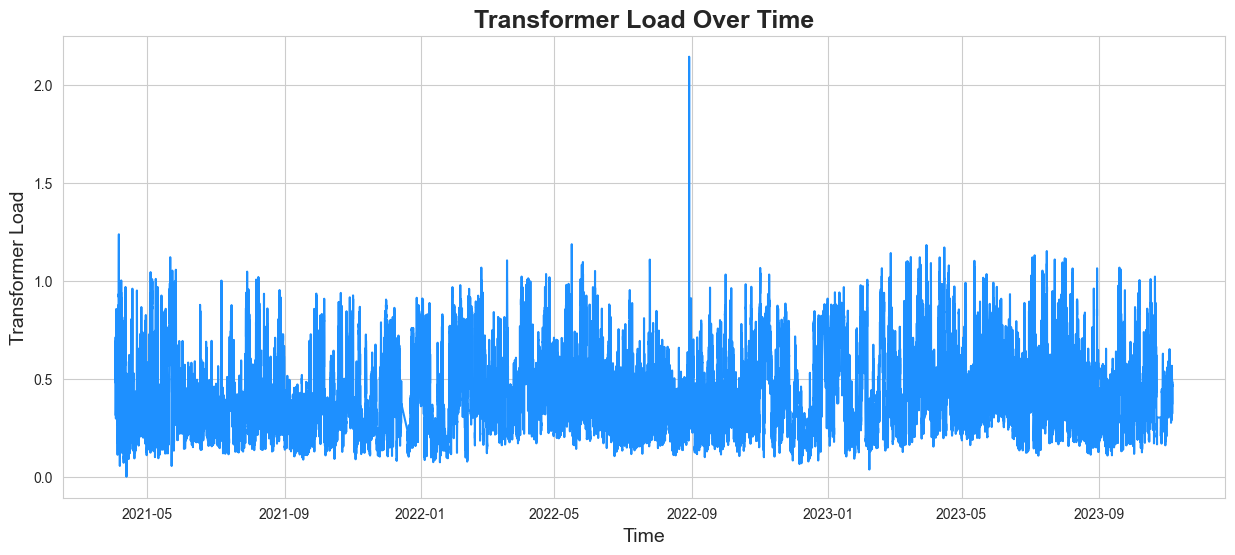

In [8]:
plt.figure(figsize=(15, 6))

# Plot the transformer load over time using seaborn
ax = sns.lineplot(x=data.index, y=data['transformer_load'], color='dodgerblue')

ax.set_title('Transformer Load Over Time', fontsize=18, fontweight='bold')
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Transformer Load', fontsize=14)


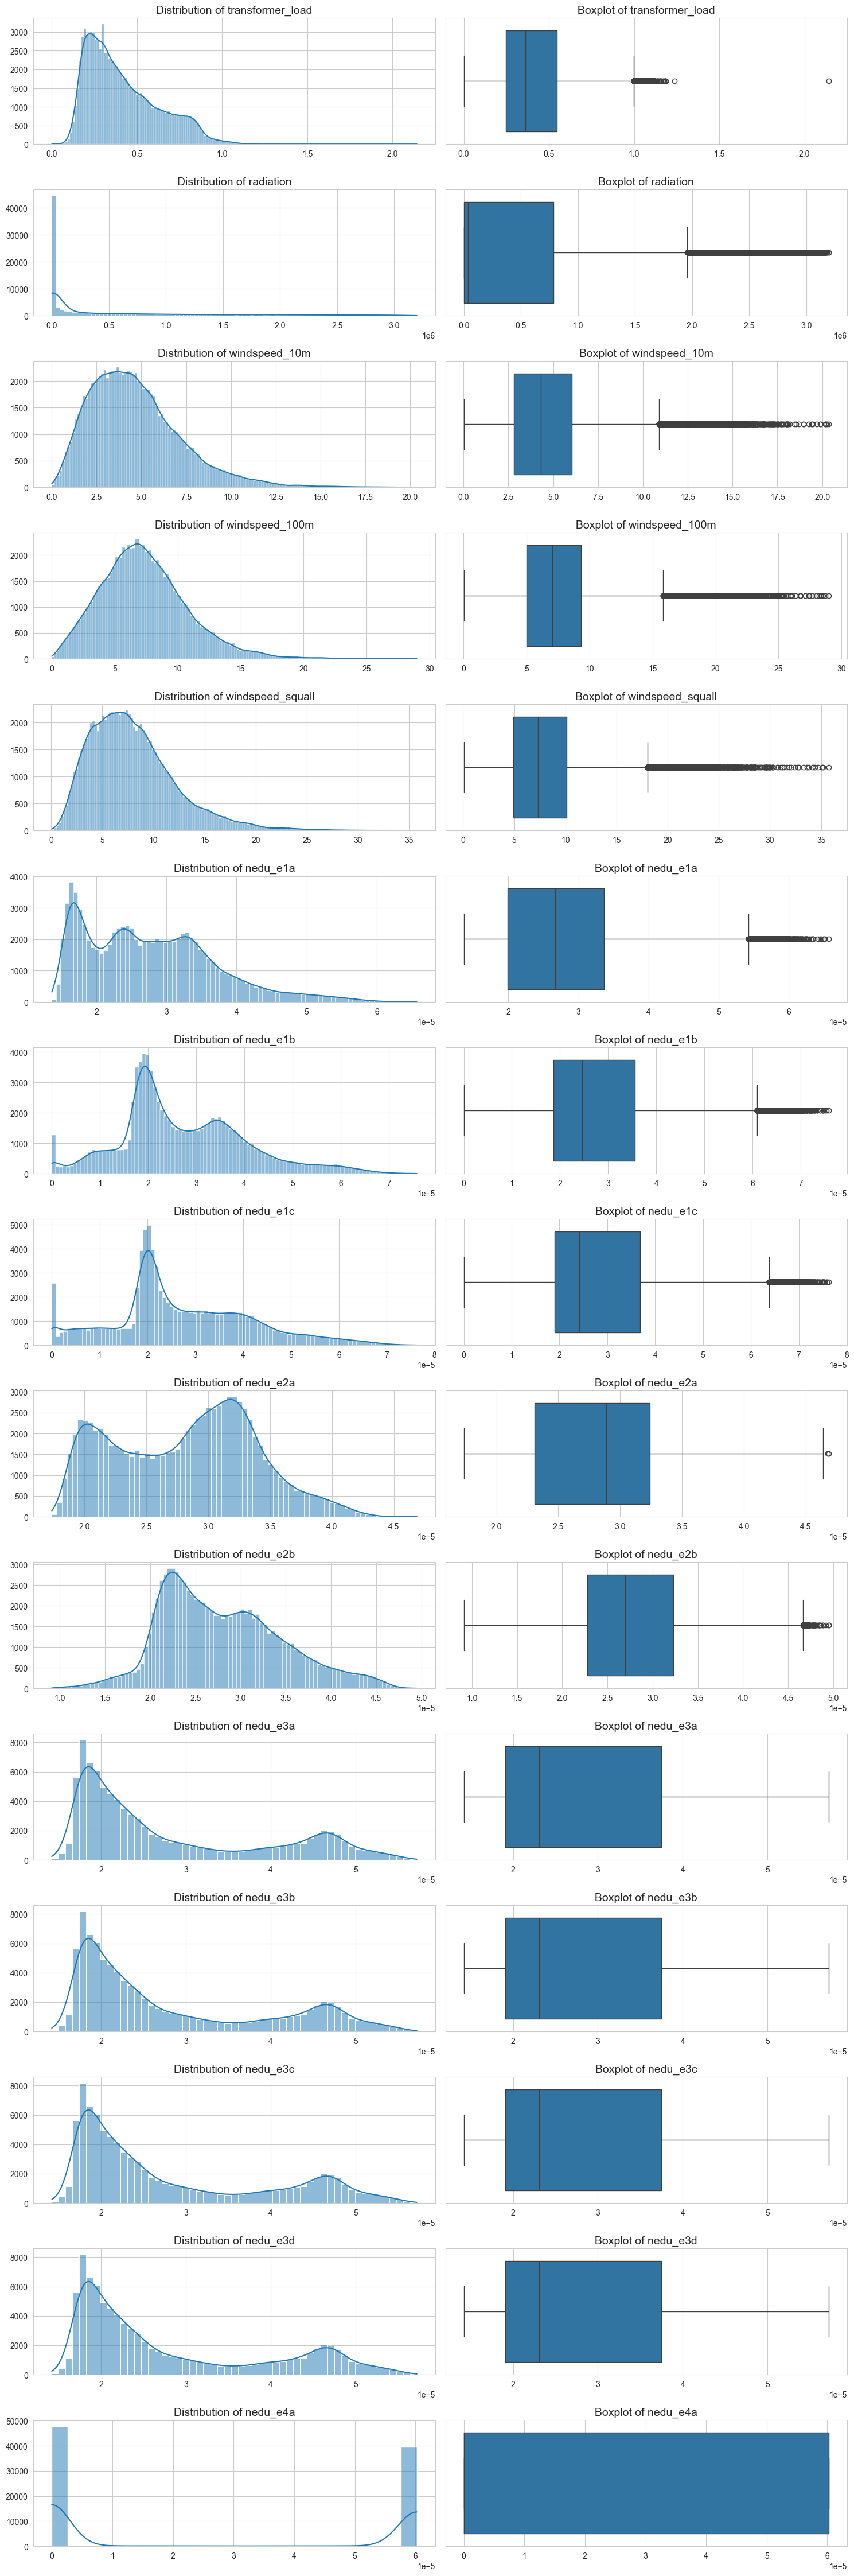

In [9]:
features = data.columns
fig, axs = plt.subplots(nrows=len(features), ncols=2, figsize=(15, len(features)*3))

# Iterate over each feature to create a distplot and a boxplot
for i, feature in enumerate(features):
    # Distribution plot on the left
    sns.histplot(data[feature], kde=True, ax=axs[i, 0])
    axs[i, 0].set_title(f'Distribution of {feature}', fontsize=14)
    axs[i, 0].set_xlabel('')
    axs[i, 0].set_ylabel('')

    # Boxplot on the right
    sns.boxplot(x=data[feature], ax=axs[i, 1])
    axs[i, 1].set_title(f'Boxplot of {feature}', fontsize=14)
    axs[i, 1].set_xlabel('')
    axs[i, 1].set_ylabel('')

plt.tight_layout()

# Outlier Detection

Text(0, 0.5, 'Transformer Load')

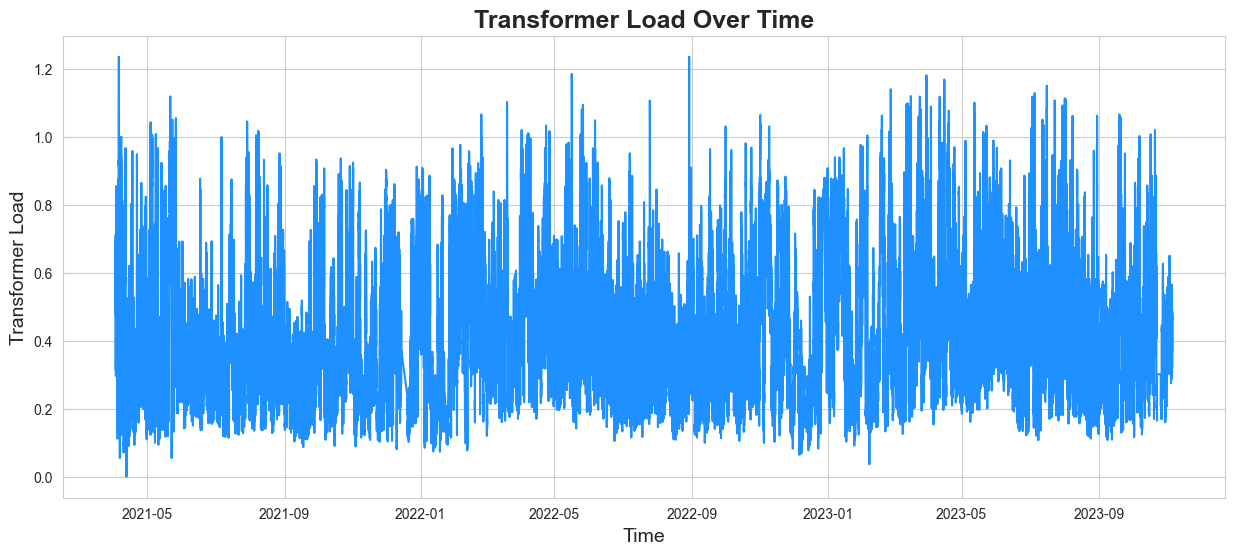

In [10]:
# Remove the heavy outlier from the dataset where the transformer load is 2.14
data['transformer_load'] = data['transformer_load'].replace(data['transformer_load'].max(), 
                                                            data['transformer_load'].nlargest(2).iloc[-1])

plt.figure(figsize=(15, 6))

# Plot the transformer load over time using seaborn
ax = sns.lineplot(x=data.index, y=data['transformer_load'], color='dodgerblue')

ax.set_title('Transformer Load Over Time', fontsize=18, fontweight='bold')
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Transformer Load', fontsize=14)


# Feature Engineering

In [11]:
## Derived Features ##

# Function to convert seconds to sine and cosine components to represent cyclical time as continuous features
def cyclical_encode(data, max_val):
    data_sin = np.sin(2 * np.pi * data/max_val)
    data_cos = np.cos(2 * np.pi * data/max_val)
    return data_sin, data_cos

# Year
data['year'] = data.index.year

# Second of day sine and cosine
second_of_day = data.index.hour * 3600 + data.index.minute * 60 + data.index.second
data['second_of_day_sin'], data['second_of_day_cos'] = cyclical_encode(second_of_day, 24*3600)

# Day of the week sine and cosine
day_of_week = data.index.dayofweek
data['day_of_week_sin'], data['day_of_week_cos'] = cyclical_encode(day_of_week, 7)

# Day of the year sine and cosine
day_of_year = data.index.dayofyear
data['day_of_year_sin'], data['day_of_year_cos'] = cyclical_encode(day_of_year, 365)

data[['year', 'second_of_day_sin', 'second_of_day_cos', 'day_of_week_sin', 'day_of_week_cos', 'day_of_year_sin', 'day_of_year_cos']].head()

,year,second_of_day_sin,second_of_day_cos,day_of_week_sin,day_of_week_cos,day_of_year_sin,day_of_year_cos
Date,,,,,,,
2021-04-02 10:15:00+00:00,2021,0.442289,-0.896873,-0.433884,-0.900969,0.999917,-0.01291
2021-04-02 10:30:00+00:00,2021,0.382683,-0.923880,-0.433884,-0.900969,0.999917,-0.01291
2021-04-02 10:45:00+00:00,2021,0.321439,-0.946930,-0.433884,-0.900969,0.999917,-0.01291
2021-04-02 11:00:00+00:00,2021,0.258819,-0.965926,-0.433884,-0.900969,0.999917,-0.01291
2021-04-02 11:15:00+00:00,2021,0.195090,-0.980785,-0.433884,-0.900969,0.999917,-0.01291


In [12]:
## Lagged Features ##

# Calculate the number of intervals in a day from the datetime index
min_interval = data.index.to_series().diff().min()
intervals_per_day = pd.Timedelta('1 day') / min_interval

# Now create lagged features for transformer load for 2, 3 and 7 days
data['transformer_load_lag_2days'] = data['transformer_load'].shift(int(intervals_per_day * 2))
data['transformer_load_lag_5days'] = data['transformer_load'].shift(int(intervals_per_day * 5))
data['transformer_load_lag_7days'] = data['transformer_load'].shift(int(intervals_per_day * 7))

data[['transformer_load', 'transformer_load_lag_2days', 'transformer_load_lag_5days', 'transformer_load_lag_7days']]

,transformer_load,transformer_load_lag_2days,transformer_load_lag_5days,transformer_load_lag_7days
Date,,,,
2021-04-02 10:15:00+00:00,0.314834,NaN,NaN,NaN
2021-04-02 10:30:00+00:00,0.455148,NaN,NaN,NaN
2021-04-02 10:45:00+00:00,0.492845,NaN,NaN,NaN
2021-04-02 11:00:00+00:00,0.479581,NaN,NaN,NaN
2021-04-02 11:15:00+00:00,0.512740,NaN,NaN,NaN
...,...,...,...,...
2023-11-05 22:00:00+00:00,0.468412,0.491798,0.458290,0.421291
2023-11-05 22:15:00+00:00,0.460384,0.486562,0.469808,0.409075
2023-11-05 22:30:00+00:00,0.473997,0.489354,0.458290,0.411867


In [13]:
## Windowed Features ##

intervals_per_3h = pd.Timedelta('3 hour') / min_interval

# Rolling mean of wind speeds and radiation for 3 hours and 1 day
data['windspeed_100m_3h_mean'] = data['windspeed_100m'].rolling(window=int(intervals_per_3h)).mean()
data['windspeed_100m_1d_mean'] = data['windspeed_100m'].rolling(window=int(intervals_per_day)).mean()

data['windspeed_squall_3h_mean'] = data['windspeed_squall'].rolling(window=int(intervals_per_3h)).mean()
data['windspeed_squall_1d_mean'] = data['windspeed_squall'].rolling(window=int(intervals_per_day)).mean()

data['radiation_3h_mean'] = data['radiation'].rolling(window=int(intervals_per_3h)).mean()
data['radiation_1d_mean'] = data['radiation'].rolling(window=int(intervals_per_day)).mean()

# Display the dataframe with the new windowed features
data[['windspeed_100m', 'windspeed_100m_3h_mean', 'windspeed_100m_1d_mean', 
                  'windspeed_squall', 'windspeed_squall_3h_mean', 'windspeed_squall_1d_mean',
                  'radiation', 'radiation_3h_mean', 'radiation_1d_mean']].tail()

,windspeed_100m,windspeed_100m_3h_mean,windspeed_100m_1d_mean,windspeed_squall,windspeed_squall_3h_mean,windspeed_squall_1d_mean,radiation,radiation_3h_mean,radiation_1d_mean
Date,,,,,,,,,
2023-11-05 22:00:00+00:00,11.119689,10.684008,11.356980,10.207506,9.722630,11.882647,5.451507e-11,1.709299e-10,75415.93044
2023-11-05 22:15:00+00:00,11.119689,10.838474,11.356593,10.207506,9.847529,11.886644,5.451507e-11,1.709299e-10,75415.93044
2023-11-05 22:30:00+00:00,11.119689,10.980028,11.357999,10.207506,10.003252,11.889146,5.451507e-11,1.709300e-10,75415.93044
2023-11-05 22:45:00+00:00,11.119689,11.101986,11.361136,10.207506,10.177243,11.890142,5.451507e-11,1.709301e-10,75415.93044
2023-11-05 23:00:00+00:00,11.119689,11.198139,11.365941,10.207506,10.355921,11.889617,5.451507e-11,1.709303e-10,75415.93044


In [14]:
# Remove Nan values from the dataset created by the lagged and windowed feature engineering
data_processed = data.copy()
data_processed.dropna(inplace=True)
print(f'Length of original dataset: {len(data)}, length of processed dataset: {len(data_processed)}')

Length of original dataset: 90122, length of processed dataset: 89450


In [15]:
# Save the processed data
data_processed.to_pickle('20231108_Dataset_Processed.pkl')